<a href="https://colab.research.google.com/github/AR-Karthik/ETG-MachineLearningCourse/blob/main/Logistic%20Regression%20/%20Introduction_to_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.


Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **`Sigmoid function`** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

Text(0.5, 1.0, 'Sigmoid Function')

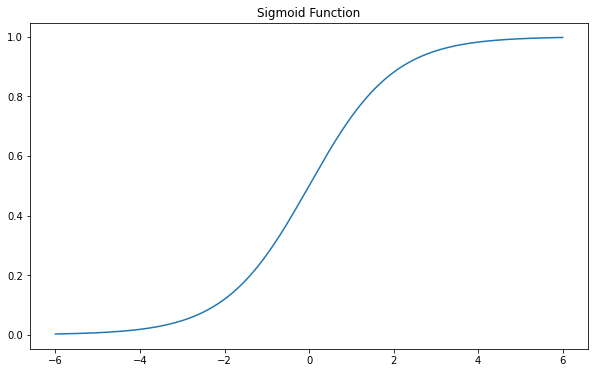

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.title("Sigmoid Function")

The logistic regression equation has a very similar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.
***
### Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data (e.g. probability of 1 if the data is the primary class).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

# Prepare Data for Logistic Regression
The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

#Lets create a Logistic Regressor from Scratch!

We use make_classification method from SKLearn Library to create our dataset.

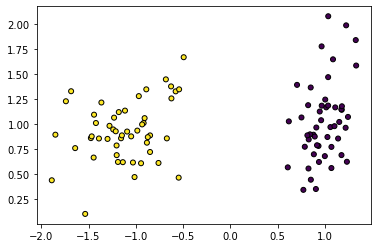

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [ ]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [ ]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [ ]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

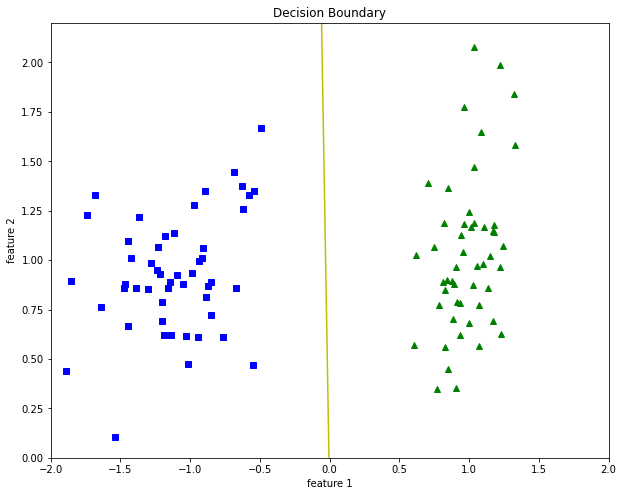

In [ ]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

# Summary
In this Notebook you discovered the logistic regression algorithm for machine learning and predictive modeling. You covered a lot of ground and learned:

- What the logistic function is and how it is used in logistic regression.
- That the key representation in logistic regression are the coefficients, just like linear regression.
- That the coefficients in logistic regression are estimated using a process called maximum-likelihood estimation.
- That making predictions using logistic regression is so easy that you can do it in excel.
- That the data preparation for logistic regression is much like linear regression.
- How to evaluate a machine learning classification problem.
- How to tune logistic regression hyperparameters.

## References:
- [Scikit Learn Library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Logistic Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)